In [3]:
import pandas as pd
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 

In [4]:
flights_peak = pd.read_csv('../data/flights_SFO.csv')

In [5]:
flights_peak.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1888629,2015,5,1,5,UA,1656,N66808,SFO,ORD,...,613.0,-30.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1888632,2015,5,1,5,US,1925,N155UW,SFO,CLT,...,803.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1888636,2015,5,1,5,DL,806,N121DE,SFO,MSP,...,542.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1888652,2015,5,1,5,UA,1200,N27421,SFO,IAH,...,630.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1888653,2015,5,1,5,AA,1052,N3ERAA,SFO,DFW,...,622.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
flights_peak.groupby('AIRLINE').size()

AIRLINE
AA    14802
AS     5744
B6     5510
DL    12179
F9     2280
HA      732
OO    36679
UA    52673
US     1970
VX    18074
WN    15892
dtype: int64

In [6]:
flights = flights_peak.groupby('AIRLINE')['FLIGHT_NUMBER','DEPARTURE_DELAY','ARRIVAL_DELAY','DIVERTED','CANCELLED','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

airlines_names =  {'AA': "American Airlines", 'AS': "Alaska Airlines",'B6':'Jetblue Airways ','DL':'Delta Air Lines','EV':'ExpressJet Airlines','F9':'Frontier Airlines','HA':'Hawaiian Airlines','MQ':'Envoy Air','NK':'Spirit Airlines','OO':'SkyWest Airlines','UA':'United Airlines','VX':'Virgin America','WN':'Southwest Airlines','US':'US Airways'}
flights = pd.DataFrame({'Airline Name': airlines_names,'Flights Total' : flights_peak.groupby('AIRLINE')['FLIGHT_NUMBER'].size()}).reset_index()

flights.columns = ['AIRLINE', 'Airline Name','Flights Total']
flights = flights.dropna()
flights.reset_index(drop=True)
flights

,AIRLINE,Airline Name,Flights Total
0,AA,American Airlines,14802.0
1,AS,Alaska Airlines,5744.0
2,B6,Jetblue Airways,5510.0
3,DL,Delta Air Lines,12179.0
5,F9,Frontier Airlines,2280.0
6,HA,Hawaiian Airlines,732.0
9,OO,SkyWest Airlines,36679.0
10,UA,United Airlines,52673.0
11,US,US Airways,1970.0
12,VX,Virgin America,18074.0


In [7]:
c = flights_peak[flights_peak['CANCELLATION_REASON'] == 'A']

f = pd.DataFrame({'Cancelled Flights Total' : c.groupby('AIRLINE')['FLIGHT_NUMBER'].count()}).reset_index()
f = pd.merge(flights, f,how='left', on = 'AIRLINE')
f['Cancelled Flights Total'].fillna(0.0, inplace=True)
f

,AIRLINE,Airline Name,Flights Total,Cancelled Flights Total
0,AA,American Airlines,14802.0,68.0
1,AS,Alaska Airlines,5744.0,15.0
2,B6,Jetblue Airways,5510.0,11.0
3,DL,Delta Air Lines,12179.0,19.0
4,F9,Frontier Airlines,2280.0,0.0
5,HA,Hawaiian Airlines,732.0,5.0
6,OO,SkyWest Airlines,36679.0,298.0
7,UA,United Airlines,52673.0,404.0
8,US,US Airways,1970.0,3.0
9,VX,Virgin America,18074.0,50.0


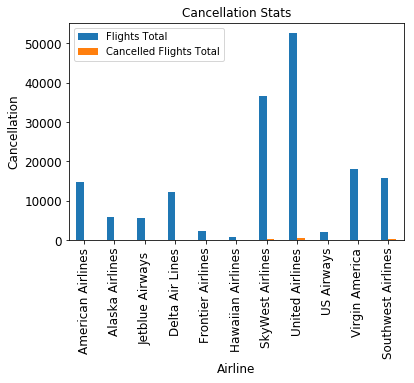

In [13]:
ax = f.plot(x='Airline Name' ,kind='bar', title ="Cancellation Stats", legend=True, fontsize=12)
ax.set_xlabel("Airline", fontsize=12)
ax.set_ylabel("Cancellation", fontsize=12)
plt.show()

In [14]:
print("Cancellations by airlines")
cancl = (f['Cancelled Flights Total'].iloc[:14])/f['Flights Total'].iloc[:14]

cancl_stats =  pd.DataFrame({'AIRLINE':f['AIRLINE'],'Airline Name':f['Airline Name'],'Cancellation':cancl})
cancl_stats 

Cancellations by airlines


,AIRLINE,Airline Name,Cancellation
0,AA,American Airlines,0.004594
1,AS,Alaska Airlines,0.002611
2,B6,Jetblue Airways,0.001996
3,DL,Delta Air Lines,0.001560
4,F9,Frontier Airlines,0.000000
5,HA,Hawaiian Airlines,0.006831
6,OO,SkyWest Airlines,0.008125
7,UA,United Airlines,0.007670
8,US,US Airways,0.001523
9,VX,Virgin America,0.002766


In [15]:
cancl_stats.describe()

,Cancellation
count,11.000000
mean,0.005341
std,0.005885
min,0.000000
25%,0.001778
50%,0.002766
75%,0.007250
max,0.021080


In [16]:
reliability_by_cancl = (f['Flights Total'].iloc[:14]- f['Cancelled Flights Total'].iloc[:14])/f['Flights Total'].iloc[:14]

reliability_stats =  pd.DataFrame({'AIRLINE':f['AIRLINE'],'Airline Name':f['Airline Name'],'Reliability by Cancellation':reliability_by_cancl})
reliability_stats 

,AIRLINE,Airline Name,Reliability by Cancellation
0,AA,American Airlines,0.995406
1,AS,Alaska Airlines,0.997389
2,B6,Jetblue Airways,0.998004
3,DL,Delta Air Lines,0.998440
4,F9,Frontier Airlines,1.000000
5,HA,Hawaiian Airlines,0.993169
6,OO,SkyWest Airlines,0.991875
7,UA,United Airlines,0.992330
8,US,US Airways,0.998477
9,VX,Virgin America,0.997234


In [17]:
reliability_stats.describe()

,Reliability by Cancellation
count,11.000000
mean,0.994659
std,0.005885
min,0.978920
25%,0.992750
50%,0.997234
75%,0.998222
max,1.000000
